# **CNN - CIFAR10 Project | Color Images**
---
---

# **Perform Standard Imports**

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# **Load CIFAR Dataset**

In [24]:
transform = transforms.ToTensor()

In [25]:
train_data = datasets.CIFAR10(root = '../Data', train = True, download = True, transform = transform)

Files already downloaded and verified


In [26]:
test_data = datasets.CIFAR10(root = '../Data', train = False, transform = transform, download = True)

Files already downloaded and verified


In [27]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [28]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

# **Create Loaders**

In [29]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

## **Define Strings of Labels**

In [30]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

## **View Batch of Images**

In [31]:
for images,labels in train_loader:
  break

In [32]:
labels

tensor([1, 5, 8, 1, 6, 1, 6, 3, 7, 9])

Label : [1 5 8 1 6 1 6 3 7 9]
Class :    car   dog  ship   car  frog   car  frog   cat horse truck


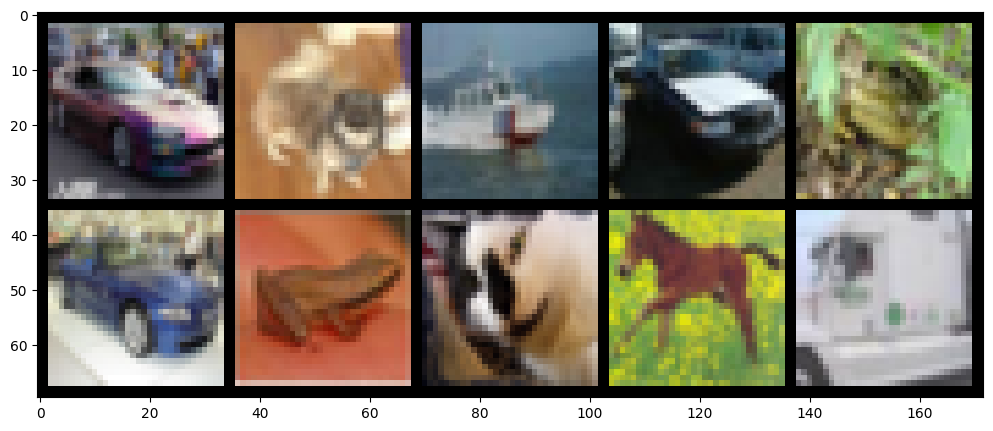

In [33]:
import matplotlib.pyplot as plt
import numpy as np

print("Label :", labels.numpy())
print("Class : ", *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow = 5)

plt.figure(figsize = (15,5))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

## Model Dimension Check for FC Layer

In [35]:
# chaneck Image Shape
images.shape

torch.Size([10, 3, 32, 32])

In [58]:
# include 2 convolution layer
# check the input size for Fully Connnected layer

(((32-2)/2)-2)/2

6.5

In [65]:
# So, it will be 6*6

## **Define Model**

In [66]:
class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, stride = 1) # input channel = 3 as Colour image has 3 channel
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1)
    # Out_channels will be random

    self.fc1 = nn.Linear(in_features = 6*6*16, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(in_features = 84, out_features = 10)



  def forward(self, X):

    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    X = X.view(-1, 6*6*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim = 1)

In [67]:
torch.manual_seed(101)

model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [68]:
for params in model.parameters():
  print(params.numel())

162
6
864
16
69120
120
10080
84
840
10


## **Define Loss Function and Optimizer**

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

## **Train Model**

In [70]:
import time

start_time = time.time()


# Variables
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop Epochs
for i in range(epochs):

  trn_corr = 0
  test_corr = 0

  # TRAIN
  # ----------------------------------------------------------------------------------------------
  # ----------------------------------------------------------------------------------------------
  for b,(X_train, y_train) in enumerate(train_loader):

    b= b+1

    # Apply the Model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # TRACKING number of correct predictions - NOT MANDATORY
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print interim results
    if b%1000 ==0:
      print(f"EPOCH : {i}    BATCH : {b}   LOSS : {loss.item()}   Accuracy: {trn_corr.item()*100/(10*b):7.3f}%')")

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # TEST
  # ----------------------------------------------------------------------------------------------
  # ----------------------------------------------------------------------------------------------
  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):

      # Apply the model
      y_val = model(X_test)

      # Tally the number of correct predictions
      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  # TRACKING PURPOSE - NOT MANDATORY
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)




current_time = time.time()
time_took = current_time-start_time
print(f"time took : {time_took} seconds" )

EPOCH : 0    BATCH : 1000   LOSS : 1.7409179210662842
EPOCH : 0    BATCH : 2000   LOSS : 2.285053253173828
EPOCH : 0    BATCH : 3000   LOSS : 1.4111042022705078
EPOCH : 0    BATCH : 4000   LOSS : 1.7755606174468994
EPOCH : 0    BATCH : 5000   LOSS : 0.8754432797431946
EPOCH : 1    BATCH : 1000   LOSS : 1.093034029006958
EPOCH : 1    BATCH : 2000   LOSS : 1.553663730621338
EPOCH : 1    BATCH : 3000   LOSS : 2.1140220165252686
EPOCH : 1    BATCH : 4000   LOSS : 1.6909030675888062
EPOCH : 1    BATCH : 5000   LOSS : 1.2458784580230713
EPOCH : 2    BATCH : 1000   LOSS : 1.2901976108551025
EPOCH : 2    BATCH : 2000   LOSS : 0.8642668724060059
EPOCH : 2    BATCH : 3000   LOSS : 1.047487497329712
EPOCH : 2    BATCH : 4000   LOSS : 0.6846994161605835
EPOCH : 2    BATCH : 5000   LOSS : 1.2699257135391235
EPOCH : 3    BATCH : 1000   LOSS : 1.0939476490020752
EPOCH : 3    BATCH : 2000   LOSS : 1.1621534824371338
EPOCH : 3    BATCH : 3000   LOSS : 0.9861525297164917
EPOCH : 3    BATCH : 4000   LOSS

## **Save Model (optional)**

In [71]:
torch.save(model.state_dict(), 'myCIFARmodel.pt')

## **Plot Accuracy and Comparisions**

In [82]:
train_losses = [fl.item() for fl in train_losses ]


AttributeError: ignored

In [83]:
test_losses = [fl.item() for fl in train_losses ]

AttributeError: ignored

In [85]:
train_losses

[0.8754432797431946,
 1.2458784580230713,
 1.2699257135391235,
 2.263371467590332,
 1.2357509136199951,
 1.1183396577835083,
 0.5287799835205078,
 0.24146361649036407,
 0.864802360534668,
 1.1410835981369019]

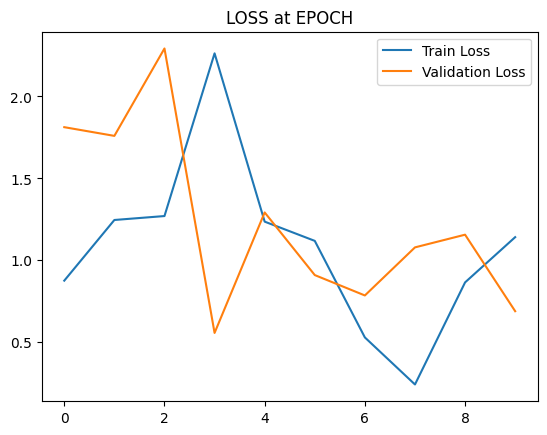

In [84]:

plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Validation Loss')
plt.title("LOSS at EPOCH")
plt.legend()

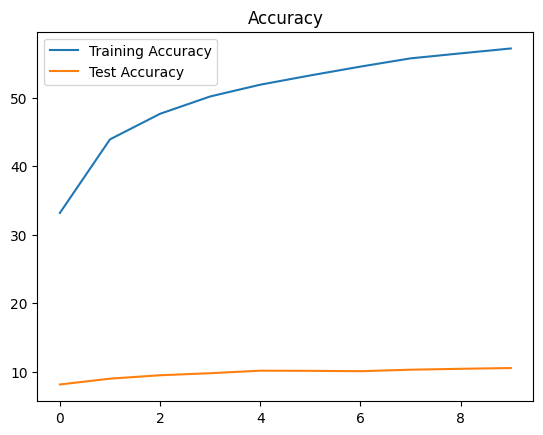

In [89]:
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/600 for t in test_correct], label = "Test Accuracy")
plt.title("Accuracy")
plt.legend();

In [87]:
train_correct

[tensor(19910),
 tensor(26351),
 tensor(28590),
 tensor(30107),
 tensor(31138),
 tensor(31949),
 tensor(32721),
 tensor(33442),
 tensor(33880),
 tensor(34307)]

In [88]:
test_correct

[tensor(4893),
 tensor(5403),
 tensor(5701),
 tensor(5879),
 tensor(6100),
 tensor(6087),
 tensor(6055),
 tensor(6186),
 tensor(6266),
 tensor(6332)]

In [90]:
num_c = test_correct[-1].item()
num_c

6332

In [92]:
num_c *100 / 10000

63.32

## **Display Confusion Matrix**

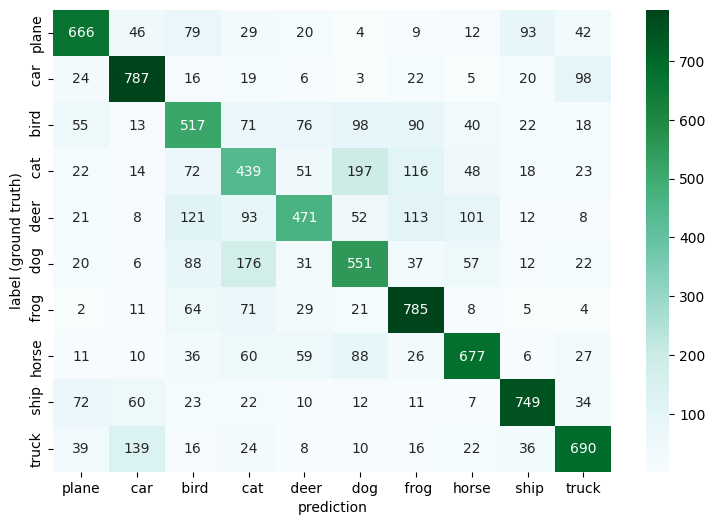

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();